<a href="https://colab.research.google.com/github/JordanLevy99/dsc167-paper1/blob/master/DSC_167_Paper_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd

'/Users/jordanlevy/Documents/UCSD/Senior/Quarter 3/DSC 167/dsc167-paper1'

In [2]:
import os
# os.chdir('dsc167-paper1')


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import metrics

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
oakland = pd.read_csv('data/ca_oakland_2020_04_01.csv')

/Users/jordanlevy/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,10,22,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Differences by Location**

In [9]:
oakland['lat'].describe()

count    133293.000000
mean         37.787397
std           0.028434
min          37.415738
25%          37.765075
50%          37.786213
75%          37.809163
max          38.133225
Name: lat, dtype: float64

In [20]:
oakland = oakland.loc[set(oakland.index)-(set(oakland['lng'].nlargest(4).index))]

In [29]:
oakland['search_basis'].value_counts()

other             27400
probable cause    12710
consent            1043
Name: search_basis, dtype: int64

**Luck Egalitarianism**: certain neighborhoods are more likely to have traffic stops, compare the TP- and FP- rates among these different neighborhoods.

In [32]:
[(oakland['contraband_drugs']==True)]

0           NaN
1         False
2         False
3           NaN
4           NaN
          ...  
133402     True
133403     True
133404     True
133405      NaN
133406    False
Name: contraband_drugs, Length: 133403, dtype: object

In [27]:
oakland['contraband_drugs']

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'beat',
       'subject_age', 'subject_race', 'subject_sex', 'officer_assignment',
       'type', 'arrest_made', 'citation_issued', 'warning_issued', 'outcome',
       'contraband_found', 'contraband_drugs', 'contraband_weapons',
       'search_conducted', 'search_basis', 'reason_for_stop',
       'use_of_force_description', 'raw_subject_sdrace',
       'raw_subject_resultofencounter', 'raw_subject_searchconducted',
       'raw_subject_typeofsearch', 'raw_subject_resultofsearch'],
      dtype='object')

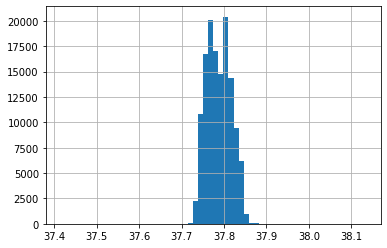

In [21]:
oakland['lat'].hist(bins=60)

In [ ]:
oakland.columns

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'beat',
       'subject_age', 'subject_race', 'subject_sex', 'officer_assignment',
       'type', 'arrest_made', 'citation_issued', 'warning_issued', 'outcome',
       'contraband_found', 'contraband_drugs', 'contraband_weapons',
       'search_conducted', 'search_basis', 'reason_for_stop',
       'use_of_force_description', 'raw_subject_sdrace',
       'raw_subject_resultofencounter', 'raw_subject_searchconducted',
       'raw_subject_typeofsearch', 'raw_subject_resultofsearch'],
      dtype='object')

In [9]:
oakland["search_basis"].value_counts()

other             27402
probable cause    12712
consent            1043
Name: search_basis, dtype: int64

In [10]:
# oakland[(oakland["contraband_found"] == False) & (oakland["arrest_made"] == True)]

In [11]:
oakland[(oakland["contraband_found"] == False) & (oakland["arrest_made"] == True)].head()

,raw_row_number,date,time,location,lat,lng,beat,subject_age,subject_race,subject_sex,...,contraband_weapons,search_conducted,search_basis,reason_for_stop,use_of_force_description,raw_subject_sdrace,raw_subject_resultofencounter,raw_subject_searchconducted,raw_subject_typeofsearch,raw_subject_resultofsearch
22,36,2013-04-01,23:41:00,800 23RD St,37.799486,-122.242997,NaN,NaN,black,female,...,False,True,other,Consensual Encounter,NaN,B,"Misdemeanor Arrest,",Yes,"Incident to Arrest,",NaN
48,58|59,2013-04-02,11:39:00,9700 Blk Empire Rd,37.731753,-122.193366,NaN,NaN,black,male,...,False,True,other,Probable Cause,NaN,B,"FI Report,|Felony Arrest,",No|Yes,"NA|Incident to Arrest,",NaN
49,60,2013-04-02,12:36:00,3400 MARTIN LUTHER KING JR WY,37.823398,-122.270024,NaN,NaN,black,male,...,False,True,other,Reasonable Suspicion,NaN,B,"Felony Arrest,",Yes,"Incident to Arrest,",NaN
51,62,2013-04-02,13:00:00,4578 International Blvd,37.771103,-122.211728,NaN,NaN,other,male,...,False,True,other,Consensual Encounter,NaN,O,"Felony Arrest,",Yes,"Incident to Arrest,",NaN
60,71,2013-04-02,15:16:00,100th Ave & Walnut St,37.743387,-122.166924,NaN,NaN,black,male,...,False,True,probable cause,Probable Cause,NaN,B,"Misdemeanor Arrest,",Yes,"Weapons,",NaN


In [34]:
#pd.crosstab(oakland['search_conducted'], oakland['contraband_found'], normalize=True, margins=True)


b_search = oakland[oakland['subject_race'] == 'black']
w_search = oakland[oakland['subject_race'] == 'white']
h_search = oakland[oakland['subject_race'] == 'hispanic']
a_search = oakland[oakland['subject_race'] == 'asian/pacific islander']

print("Black Population:", len(b_search))
print("Hispanic Population:", len(h_search))
print("White Population:", len(w_search))
print("Asian + PI Population:", len(a_search))



Black Population: 78921
Hispanic Population: 26257
White Population: 15628
Asian + PI Population: 8099


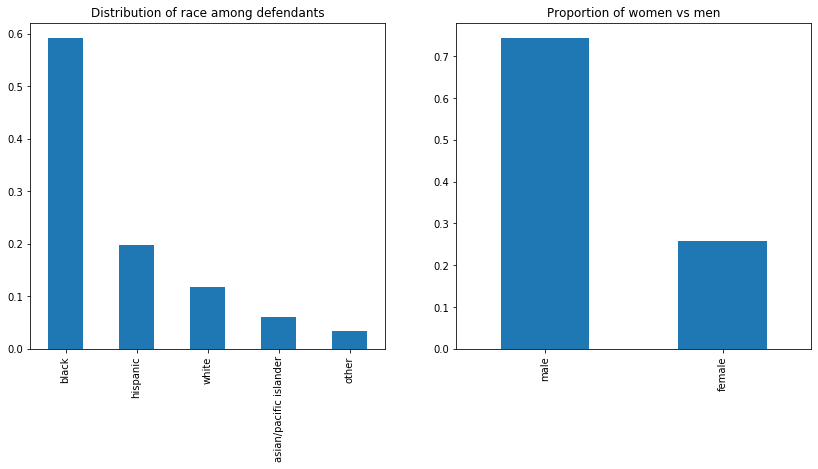

In [13]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

(
    oakland.subject_race.value_counts(normalize=True)
    .plot(kind='bar', title='Distribution of race among defendants', ax=axes[0])
)

(
    oakland.subject_sex.value_counts(normalize=True)
    .plot(kind='bar', title='Proportion of women vs men', ax=axes[1])
);

In [38]:
contra_search = pd.concat([
    pd.crosstab(b_search['search_conducted'], b_search['contraband_found'], normalize=True, margins=False),
    pd.crosstab(w_search['search_conducted'], w_search['contraband_found'], normalize=True, margins=False),
    pd.crosstab(a_search['search_conducted'], a_search['contraband_found'], normalize=True, margins=False),
    pd.crosstab(h_search['search_conducted'], h_search['contraband_found'], normalize=True, margins=False)     
], axis=1, keys=['Black', 'White', 'Asian', 'Hispanic'])

In [41]:
contra_search

Black              White              Asian            \
contraband_found     False     True     False    True      False     True    
search_conducted                                                             
True              0.854702  0.145298  0.82875  0.17125  0.865031  0.134969   

                  Hispanic            
contraband_found     False     True   
search_conducted                      
True              0.833978  0.166022

In [15]:
# parity measures...
# Demo


In [16]:
oakland_searched_bw = oakland[(oakland["search_conducted"] == True) & (oakland["subject_race"].isin(["black", "white"]))]
oakland_searched_bw['contraband_found'] = oakland_searched_bw['contraband_found'].astype('bool')

oakland_searched_b = oakland[(oakland["search_conducted"] == True) & (oakland["subject_race"] == "black")]
oakland_searched_b['contraband_found'] = oakland_searched_b['contraband_found'].astype('bool')

oakland_searched_w = oakland[(oakland["search_conducted"] == True) & (oakland["subject_race"] == "white")]
oakland_searched_w['contraband_found'] = oakland_searched_w['contraband_found'].astype('bool')

/Users/jordanlevy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jordanlevy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/jordanlevy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [17]:
print("Accuracy: Proportion of searches that turned something up or True Positive")
print(
    'accuracy (All):  \t %f' % metrics.accuracy_score(oakland_searched_bw.contraband_found, oakland_searched_bw.search_conducted), 
    'accuracy (Black):\t %f' % metrics.accuracy_score(oakland_searched_b.contraband_found, oakland_searched_b.search_conducted), 
    'accuracy (White):\t %f' % metrics.accuracy_score(oakland_searched_w.contraband_found, oakland_searched_w.search_conducted),
    sep='\n'
)

Accuracy: Proportion of searches that turned something up or True Positive
accuracy (All):  	 0.147263
accuracy (Black):	 0.145346
accuracy (White):	 0.171250


In [ ]:

obs = (
    oakland_searched_bw
    .groupby('subject_race')
    .apply(lambda x: metrics.accuracy_score(x.contraband_found, x.search_conducted))
    .diff()
    .iloc[-1]
)

obs = abs(obs)
print("Absolute difference in accuracies between white and black drivers:", "{0}%".format(obs * 100))

Absolute difference in accuracies between white and black drivers: 2.5904454621149045%


0.0004


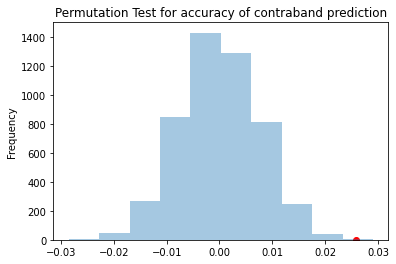

In [ ]:
metrs = []
for _ in range(5000):
    s = (
        oakland_searched_bw
        .assign(race=oakland_searched_bw.subject_race.sample(frac=1.0, replace=False).tolist())
        .groupby('race')
        .apply(lambda x: metrics.accuracy_score(x.contraband_found, x.search_conducted))
        .diff()
        .iloc[-1]
    )

    # should it be absolute value of s?
    metrs.append(s) 
    
print(pd.Series(metrs >= obs).mean())
pd.Series(metrs).plot(kind='hist', title='Permutation Test for accuracy of contraband prediction', alpha=0.4)
plt.scatter(obs, 0, c='r');

Running a permutation test results in a p-value of less 1%, which leads us to reject the hypothesis that this difference in accuracies occurred by chance

In [ ]:
pd.concat([
    pd.crosstab(b_search['search_conducted'], b_search['search_basis'], normalize=True, margins=True),
    pd.crosstab(w_search['search_conducted'], w_search['search_basis'], normalize=True, margins=True)    
], axis=1, keys=['Black', 'White'])

Black            ...          White     
search_basis       consent     other  ... probable cause  All
search_conducted                      ...                    
True              0.023314  0.679201  ...       0.289167  1.0
All               0.023314  0.679201  ...       0.289167  1.0

[2 rows x 8 columns]